In [1]:
import numpy as np

directory = "/Users/varunursekar/Projects/advDeepLearning/final_project/data/METR-LA/"

train_data = np.load(directory+'train.npz')
val_data = np.load(directory+'val.npz')
test_data = np.load(directory+'test.npz')

In [2]:
trainX = train_data['x']
trainY = train_data['y']
trainX_offsets = train_data['x_offsets']
trainY_offsets = train_data['y_offsets']

valX = val_data['x']
valY = val_data['y']
valX_offsets = val_data['x_offsets']
valY_offsets = val_data['y_offsets']

In [11]:
N = trainY.shape[0]
Nval = valY.shape[0]
output_dims = trainY.reshape(trainY.shape[0],-1).shape[1]

In [19]:
import tensorflow as tf
import matplotlib.pyplot as plt

trainY_flat = trainY.reshape(N,-1)
valY_flat = valY.reshape(Nval,-1)


In [29]:
model = tf.keras.Sequential([tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(units=256,activation='relu'),
                             tf.keras.layers.Dense(units=256,activation='relu'),
                             tf.keras.layers.Dense(units=output_dims,activation='linear')])



def scheduler(epoch, lr):
    if epoch < 50:
        return lr
    elif epoch%20==0:
        return lr/10
    else:
        return lr
    
callback = tf.keras.callbacks.LearningRateScheduler(scheduler)

callback_es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

model.compile(loss='mean_absolute_error',
              optimizer=tf.keras.optimizers.Adam(0.001))

In [30]:
history = model.fit(x=trainX, y=trainY_flat, batch_size=64, epochs=40,validation_data=(valX,valY_flat),
                    callbacks=[callback,callback_es])

Epoch 1/40
 19/375 [>.............................] - ETA: 2s - loss: 13.7101

2022-03-15 13:37:20.728067: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


375/375 [==============================] - 3s 7ms/step - loss: 4.5629 - val_loss: 3.6383 - lr: 0.0010
Epoch 2/40
  1/375 [..............................] - ETA: 1s - loss: 4.1783

2022-03-15 13:37:23.239352: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


375/375 [==============================] - 3s 7ms/step - loss: 3.3965 - val_loss: 3.2713 - lr: 0.0010
Epoch 3/40
375/375 [==============================] - 3s 7ms/step - loss: 3.1382 - val_loss: 3.2420 - lr: 0.0010
Epoch 4/40
375/375 [==============================] - 3s 7ms/step - loss: 3.0259 - val_loss: 3.1080 - lr: 0.0010
Epoch 5/40
375/375 [==============================] - 2s 7ms/step - loss: 2.9599 - val_loss: 3.0635 - lr: 0.0010
Epoch 6/40
375/375 [==============================] - 2s 7ms/step - loss: 2.9043 - val_loss: 3.0123 - lr: 0.0010
Epoch 7/40
375/375 [==============================] - 2s 7ms/step - loss: 2.8821 - val_loss: 2.9840 - lr: 0.0010
Epoch 8/40
375/375 [==============================] - 2s 7ms/step - loss: 2.8225 - val_loss: 2.9415 - lr: 0.0010
Epoch 9/40
375/375 [==============================] - 3s 7ms/step - loss: 2.8064 - val_loss: 3.0913 - lr: 0.0010
Epoch 10/40
375/375 [==============================] - 3s 7ms/step - loss: 2.7680 - val_loss: 2.9133 - lr: 

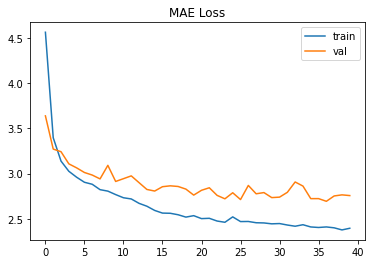

In [31]:
plt.figure()
plt.title("MAE Loss")
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='val')
plt.legend()